### Importing librairies 

In [73]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

import utils 

### Loading data 

In [74]:
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

### Visualizing the data 

In [75]:
def plotData(X, y): 
    fig = pyplot.figure()
    
    #finding admitted students indexes 
    pos = y == 1 
    
    #finding non-admitted students indexes 
    neg = y == 0
    
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

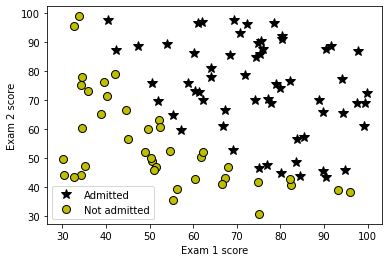

In [76]:
plotData(X,y)
# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])

# Logistic regression
***
### implementing the sigmoid function 
***
The logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

__This is a vectorized version of the sigmoid function__ 

In [1]:
def sigmoid(z):
    #non-vectorized version of the sigmoid function 
    def sig(x):
         return 1/(1 + np.exp(-x))
        
    # matrix full of values we want to calculate the sigmoid for 
    z = np.array(z)
    
    
    vfunc = np.vectorize(sig) 
    
    g = vfunc(z)
    
    return g 
    

### Purpose of the sigmoid function 

![](Figures/sigmoid_function.png)

From the graph of the sigmoid function we can clearly understand that: 
- for values $ z > 0  $ , we will have $ g(z) $ converge to 1 
- for values $ z < 0  $ , we will have $ g(z) $ converge to 0
- With $ z = 0 $, we will have $ g(z) = 0.5 $ 

We can use the following properties of the sigmoid function, to feed it a value z and we will have a probability $p$ as an output such as $ 0 \leqslant   p = g(z) \leqslant   1 $ 

___In summary, in our case the sigmoid function will be able to give us the probabilty of our output being___ $1$

consequences 
$$\begin{align*}& g(z) \geq 0.5 \newline& when \; z \geq 0\end{align*}$$

so 
$$ \begin{align*}& \theta^T x \geq 0 \Rightarrow y = 1 \newline& \theta^T x < 0 \Rightarrow y = 0 \newline\end{align*}$$ 



## Cost function 
***
### Simplified version : 
***

$$\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}$$


### Explanation : 
***

We can clearly to see that the cost function for $ y = 1 $, we want to penalize hypotheses that are far from 1 (we want them to have a bigger cost)
![](Figures/minus_log.png)

And here can also see that the cost function for $ y = 0 $, we want to penalize hypotheses that are far from 0 (we want them to have a bigger cost)
![](Figures/minus_log_2.png)


### Non-regularized cost function :
***
We can put the simplified version of the cost function in one formulae that regroup both cases of $ y = 0 $ and $ y = 1$ 
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

Vectorized version 

$$J(\theta)  = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right)
$$


### Gradient of the cost function : 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$


In [78]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [79]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X @ theta)
    
    log = np.vectorize(np.log)
    
    J = (-(y.T)@log(h) -((1-y).T)@log(1-h))/m
    
    grad = ((X.T)@(h - y))/m 
    
    
    return J, grad

###  Optimizing the cost function (learning the parameters) : 
We could've used gradient descent to optmize the cost function but there is faster algorithms than gradient descent to optimize a function   

In [80]:
initial_theta = np.zeros(n+1)
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun

theta = res.x


print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


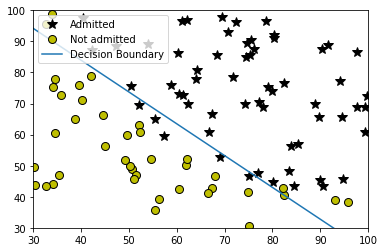

In [81]:
utils.plotDecisionBoundary(plotData, theta, X, y)

### Evaluating logistic regression

In [82]:
def predict(theta, X):
    p = sigmoid(X @ theta)
    p[p >= 0.5] = 1 
    p[p < 0.5] = 0
    return p

In [2]:
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

NameError: name 'np' is not defined

# Regularized Logistic regression 
## Load data 

In [3]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

NameError: name 'np' is not defined

## Feature mapping 
For creating non-linear decision boundries

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

In [83]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = utils.mapFeature(X[:, 0], X[:, 1])

## Cost function 
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

In [84]:
def costFunctionReg(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X @ theta)
    
    log = np.vectorize(np.log)
    
    J = (-(y.T)@log(h) -((1-y).T)@log(1-h))/m 
    last_sum = (np.dot(theta[1:], theta[1:]))
    last_therm = ((last_sum*(lambda_))/(2*m))
    J += last_therm
    
    
    grad = np.zeros(X.shape[1])
    grad[0] = ((X[:,0].T)@(h - y))/m 
    grad[1:]= (((X[:,1:].T)@(h - y))/m) + ((lambda_)/m)*theta[1:]
    return J, grad 